## 1. Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_beer = pd.read_csv("C:\\Users\\chandrpr\\Downloads\\Simplilearn Materials\\ML8.9\\1566814021_lesson8timeseriesmodeling\\Lesson 8-Time Series Modeling\\monthly-beer-production-in-austr.csv")

In [3]:
df_beer.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df_beer.isnull().any()

Month                                   False
Monthly beer production in Australia    False
dtype: bool

In [5]:
df_beer['Month'] = pd.to_datetime(df_beer['Month'])

In [39]:
df_beer.shape

(476, 3)

In [7]:
df_beer.set_index('Month', inplace=True)

In [8]:
df_beer.head()

,Monthly beer production in Australia
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [9]:
df_beer.describe()

,Monthly beer production in Australia
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


## 2. Visualize the data

<Figure size 1440x720 with 0 Axes>

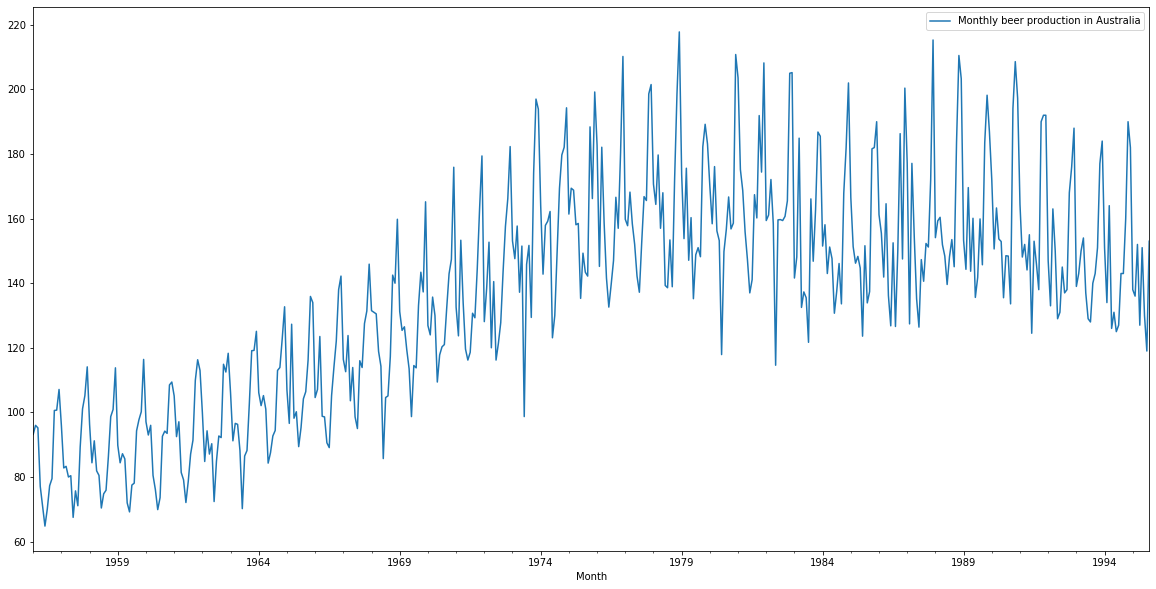

In [13]:
plt.figure(figsize=(20,10))
df_beer.plot(figsize=(20,10))

In [14]:
# Testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result = adfuller(df_beer['Monthly beer production in Australia'])
test_result

(-2.28266141878759,
 0.17762099829132078,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [18]:
# Null Hypothesis:- Time series is non stationary
# Alternate Hypothesis:- Time series is stationary
# if p<0.05 we reject null hypothesis

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p_value','Lags used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] > 0.05:
        print('This time series is non stationary')
    else:
        print('This time series is stationary')
        

In [19]:
adfuller_test(df_beer['Monthly beer production in Australia'])

ADF Test Statistic : -2.28266141878759
p_value : 0.17762099829132078
Lags used : 17
Number of observations used : 458
This time series is non stationary


## Differencing

In [20]:
df_beer['Production first difference'] = df_beer['Monthly beer production in Australia'] - df_beer['Monthly beer production in Australia'].shift(1)
df_beer['Seasonal first difference'] = df_beer['Monthly beer production in Australia'] - df_beer['Monthly beer production in Australia'].shift(12)

In [22]:
df_beer.head(10)

,Monthly beer production in Australia,Production first difference,Seasonal first difference
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,2.8,NaN
1956-03-01,95.2,-0.8,NaN
1956-04-01,77.1,-18.1,NaN
1956-05-01,70.9,-6.2,NaN
1956-06-01,64.8,-6.1,NaN
1956-07-01,70.1,5.3,NaN
1956-08-01,77.3,7.2,NaN
1956-09-01,79.5,2.2,NaN


In [24]:
adfuller_test(df_beer['Production first difference'].dropna())

ADF Test Statistic : -4.980663743064924
p_value : 2.42341178599462e-05
Lags used : 18
Number of observations used : 456
This time series is stationary


In [25]:
adfuller_test(df_beer['Seasonal first difference'].dropna())

ADF Test Statistic : -2.8967624777519947
p_value : 0.04572577462359792
Lags used : 17
Number of observations used : 446
This time series is stationary


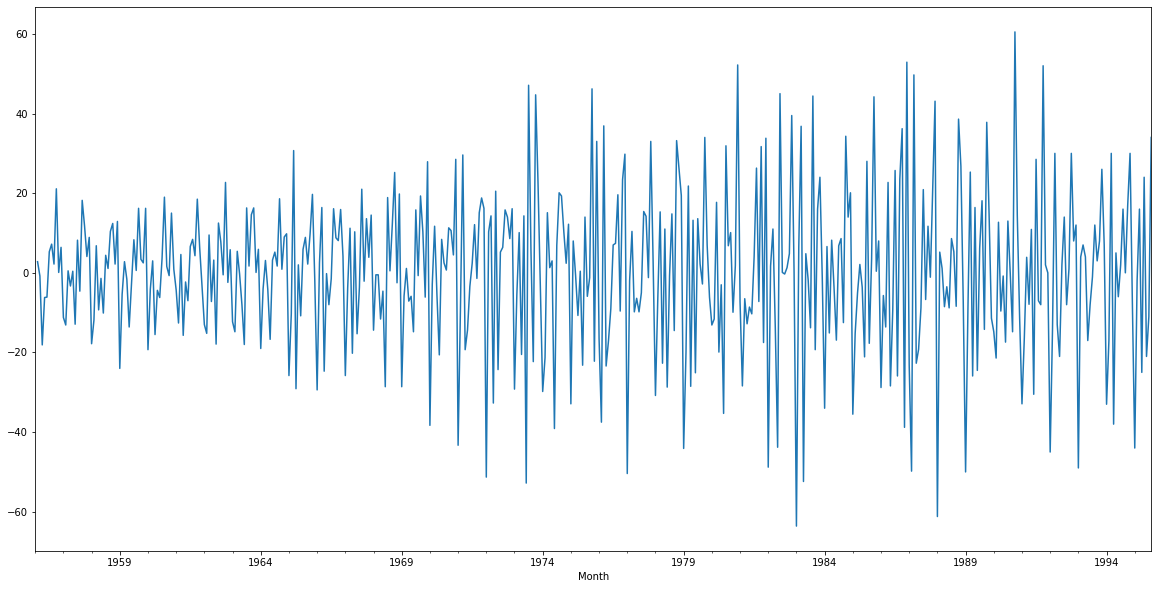

In [26]:
df_beer['Production first difference'].plot(figsize=(20,10))

## Auto Regressive Model

In [28]:
from pandas.plotting import autocorrelation_plot

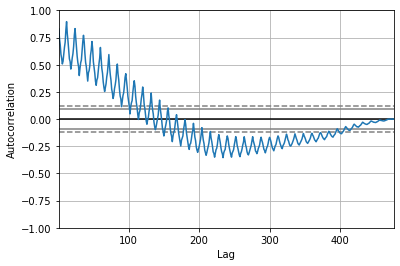

In [29]:
autocorrelation_plot(df_beer['Monthly beer production in Australia'])

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

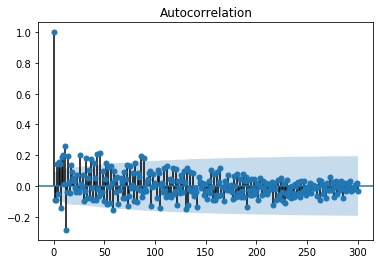

<Figure size 1080x576 with 0 Axes>

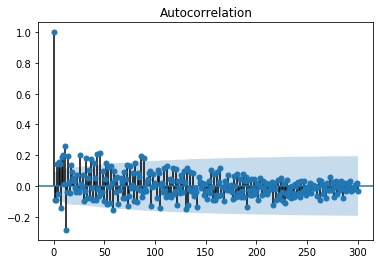

In [37]:
fig = plt.figure(figsize=(15,8))
plot_acf(df_beer['Seasonal first difference'].dropna(), lags=300)

C:\Users\chandrpr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


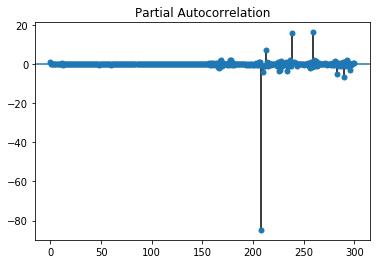

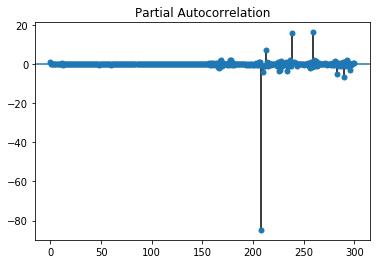

In [38]:
plot_pacf(df_beer['Seasonal first difference'].dropna(), lags=300)

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = ARIMA(df_beer['Monthly beer production in Australia'], order=(1,1,1))
model_fit = model.fit()

C:\Users\chandrpr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\chandrpr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       ARIMA Model Results                                        
==================================================================================================
Dep. Variable:     D.Monthly beer production in Australia   No. Observations:                  475
Model:                                     ARIMA(1, 1, 1)   Log Likelihood               -2027.562
Method:                                           css-mle   S.D. of innovations             17.254
Date:                                    Thu, 23 Jul 2020   AIC                           4063.124
Time:                                            14:48:40   BIC                           4079.778
Sample:                                        02-01-1956   HQIC                          4069.673
                                             - 08-01-1995                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1404      0.072      1.963      0.050       0.000       0.281
ar.L1.D.Monthly beer production in Australia     0.4801      0.043     11.214      0.000       0.396       0.564
ma.L1.D.Monthly beer production in Australia    -0.9552      0.010    -91.628      0.000      -0.976      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0829           +0.0000j            2.0829            0.0000
MA.1            1.0469           +0.0000j            1.0469            0.0000
-----------------------------------------------------------------------------
"""

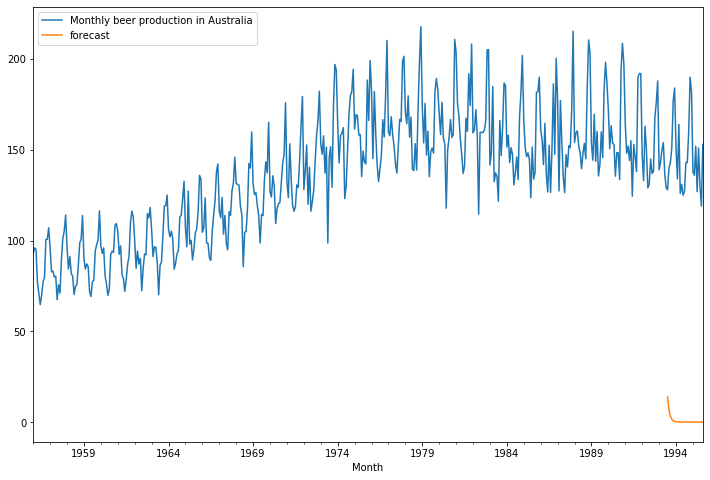

In [48]:
df_beer['forecast'] = model_fit.predict(start=450,end=476,dynamic=True)
df_beer[['Monthly beer production in Australia','forecast']].plot(figsize=(12,8))

In [49]:
import statsmodels.api as sm

In [55]:
model = sm.tsa.statespace.SARIMAX(df_beer['Monthly beer production in Australia'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\chandrpr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


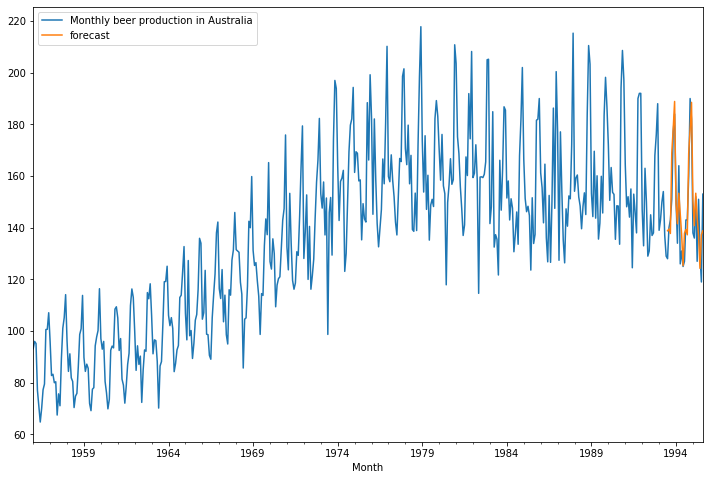

In [56]:
df_beer['forecast'] = results.predict(start=450,end=476,dynamic=True)
df_beer[['Monthly beer production in Australia','forecast']].plot(figsize=(12,8))

In [59]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_beer.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [60]:
df_beer.index[-1]

Timestamp('1995-08-01 00:00:00')

In [64]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_beer.columns)

In [65]:
future_dates_df.tail()

,Monthly beer production in Australia,Production first difference,Seasonal first difference,forecast
1997-03-01,NaN,NaN,NaN,NaN
1997-04-01,NaN,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN,NaN


In [67]:
df_beer_future = pd.concat([df_beer, future_dates_df])

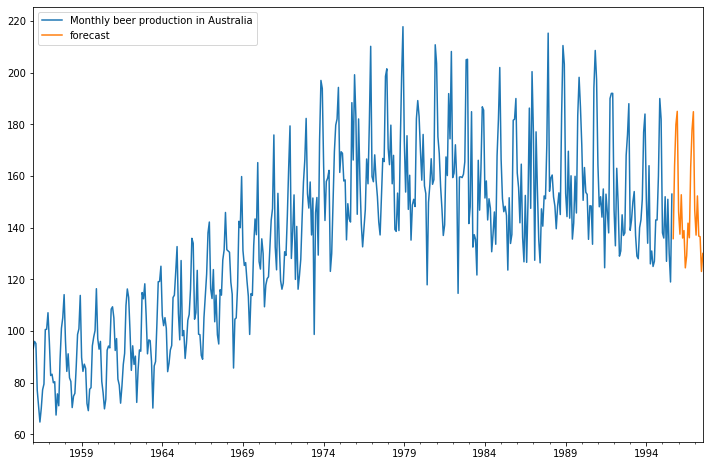

In [69]:
df_beer_future['forecast'] = results.predict(start=476,end=500,dynamic=True)
df_beer_future[['Monthly beer production in Australia','forecast']].plot(figsize=(12,8))